# Bandwidth Extension of undersampled reconstructed room impulse responses

### Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os.path
import sys
from src.PyOctaveBand import PyOctaveBand
import h5py
import matplotlib.patches as mpatches
from src.validation_responses.evaluation_metrics import get_eval_metrics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
from aux_func import *
import pathlib

In [7]:
csgmfilepath = pathlib.Path("..", "models", "CSGM", "inference_data")
hififilepath = pathlib.Path("..", "models", "HiFiGAN", "generated_files")
seganfilepath = pathlib.Path("..", "models", "SEGAN", "generated_files")
npzfilecsgm = os.path.join(str(csgmfilepath), 'inference_data.npz')
npzfilesegan = os.path.join(str(seganfilepath), 'generator_inference_file.npz')
npzfilehifi = os.path.join(str(hififilepath), 'generator_inference_file.npz')
npzfilehifiproc = os.path.join(str(hififilepath), 'generator_inference_processed.npz')

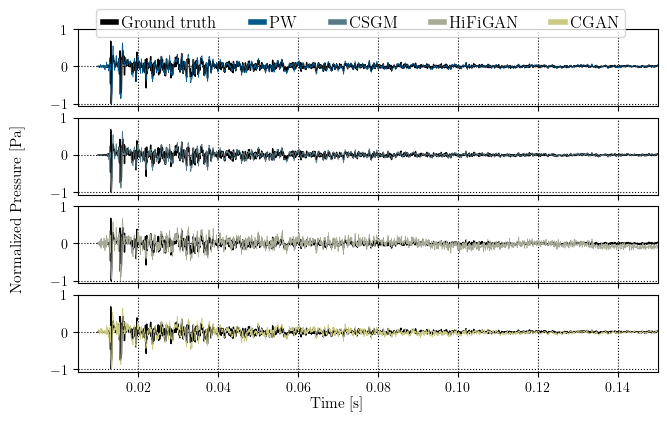

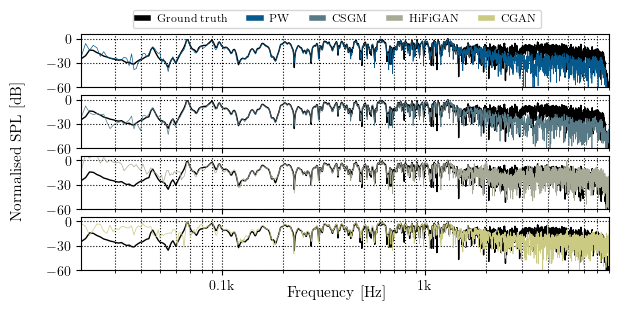

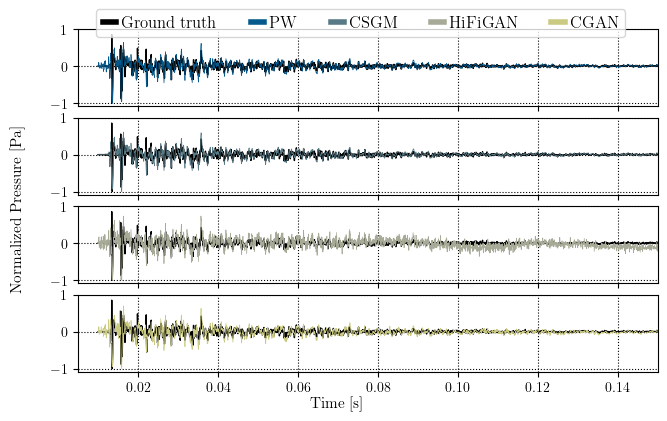

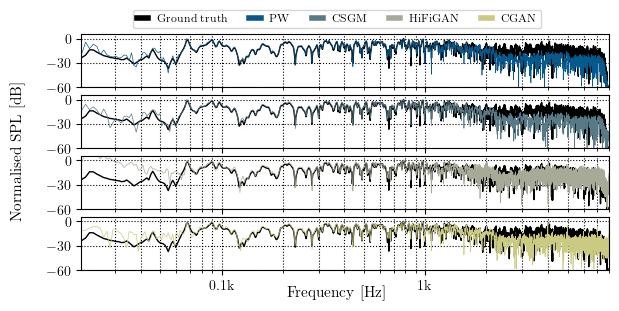

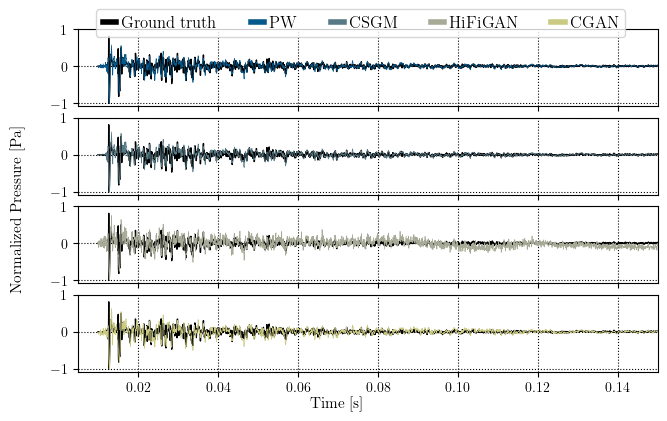

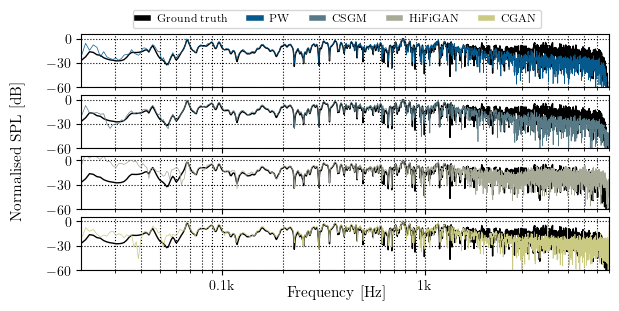

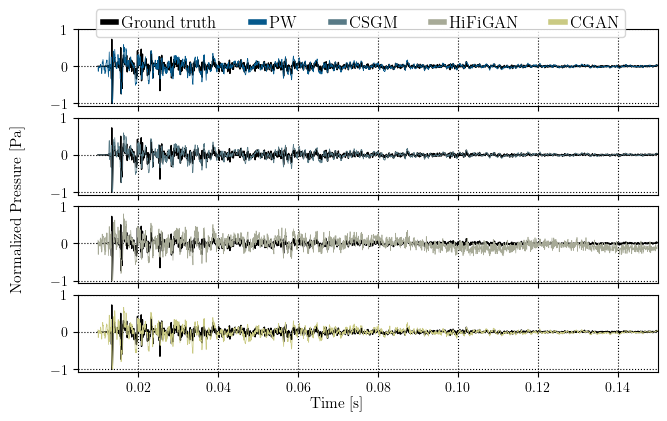

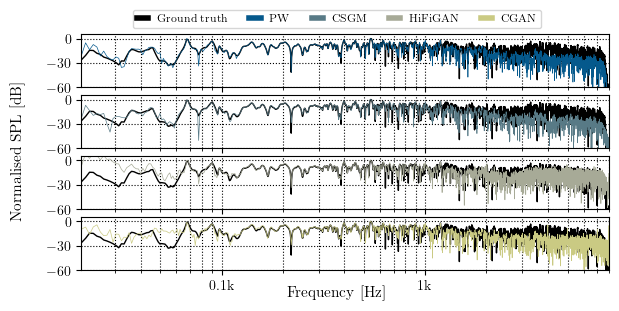

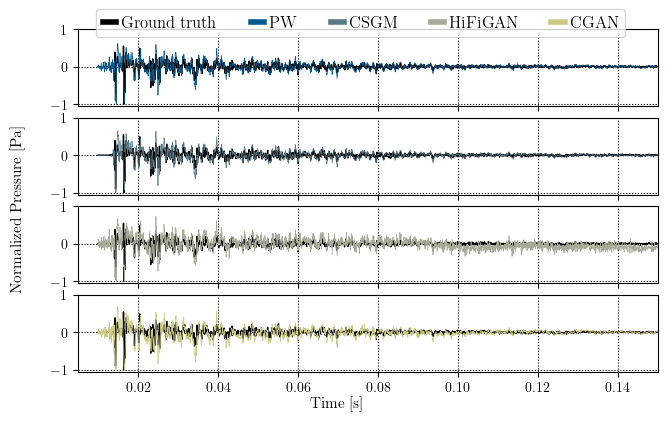

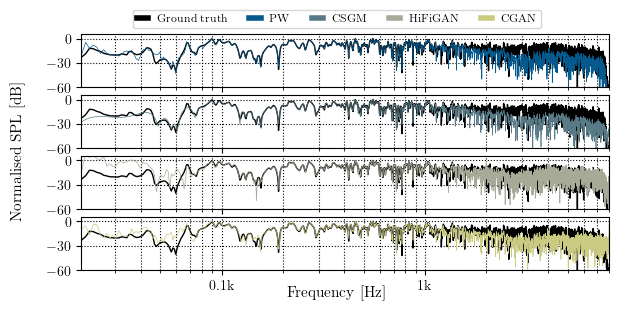

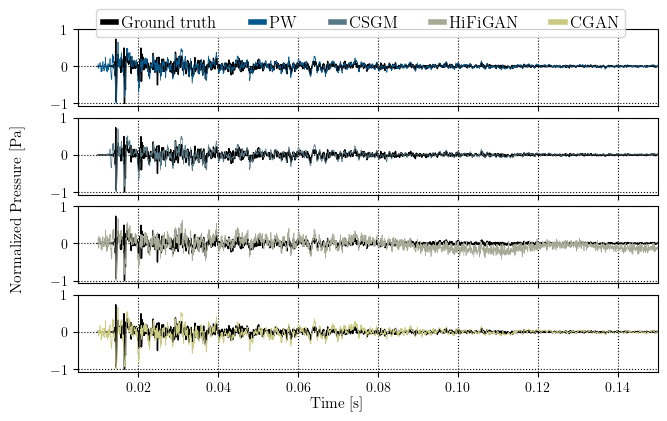

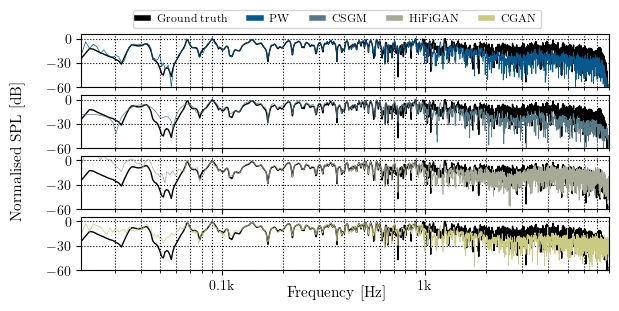

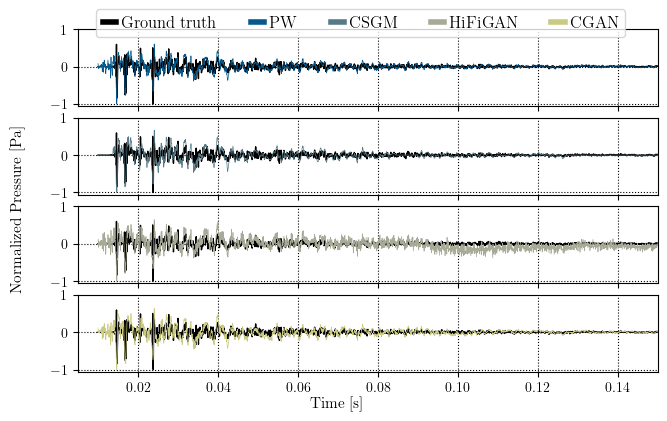

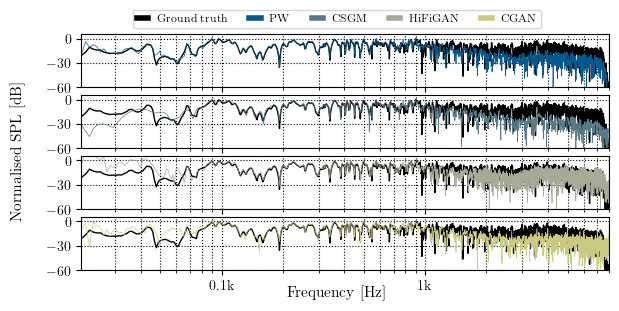

In [14]:
# testlist = [2]
testlist = [0, 2, 5, 8, 10, 13, 14]
for ind in testlist:
    plot_all_rirs(index=ind)
    plot_all_frfs(index=ind)
# save_rirs()
# run_metrics()
# plot_broadband_error_dist(magnitude = True)


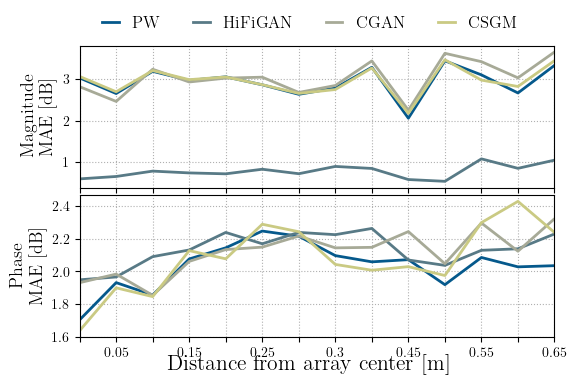

In [4]:
metric = 'mae'
quantity = 'mag'
plot_dict1, r = fdmetric(metric, quantity)
# metric = 'nmse'
quantity = 'phase'
plot_dict2, _ = fdmetric(metric, quantity)
# fig,ax = plt.subplots(figsize=(width, width/2))
figsize = plot_settings()
fig, ax = plt.subplots(2,1, sharex = True, figsize=(1.8*figsize[0], 1.8*figsize[1]))
ax[0] = plot_freq_position_data(r, plot_dict1, ylabel = 'Magnitude\n MAE [dB]', ax = ax[0])
ax[1] = plot_freq_position_data(r, plot_dict2, ylabel = 'Phase\n MAE [dB]', ax = ax[1])
ax[0].set_xlim([0., 13])
handles_1, labels_1 = ax[0].get_legend_handles_labels()

fig.subplots_adjust(wspace=0.05, hspace=0.05)

legend = fig.legend(handles_1, labels_1, bbox_to_anchor=(0., 0.9, 1., .102), loc='lower center',
                    ncol=4,  borderaxespad=0., handlelength=1, frameon=False)
fig.supxlabel(r'Distance from array center [m]')
fig.show()


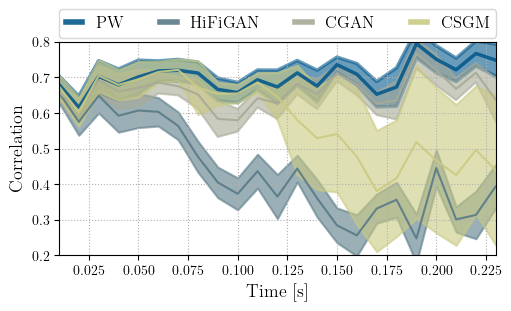

In [11]:
""" Plot td metrics"""
metric = 'corr'
response = 0
response_numbers = np.arange(0, 15)
PWdata = []
SEGANdata = []
HiFidata = []
CSGMdata = []
# for response_number in response_numbers[response:response + 1]:
for response_number in response_numbers:
    h5path1 = os.path.join(str(seganfilepath),f'metrics_inference_{response_number}.h5')
    h5path2 = os.path.join(str(hififilepath),f'metrics_inference_{response_number}.h5')
    h5path3 = os.path.join(str(csgmfilepath),f'metrics_inference_{response_number}.h5')
    metrics_SEGAN = config_metrics(h5path1)
    metrics_hifi = config_metrics(h5path2)
    metrics_csgm = config_metrics(h5path3)
    PWdata.append(metrics_hifi[f'td_plwav{metric}'])
    SEGANdata.append(metrics_SEGAN[f'td_gan{metric}'], )
    HiFidata.append(metrics_hifi[f'td_gan{metric}'])
    CSGMdata.append(metrics_csgm[f'td_gan{metric}'])
    t = metrics_csgm['time_intervals']

plot_dict = {
    'PW': np.squeeze(PWdata),
    'HiFiGAN': np.squeeze(HiFidata),
    'CGAN': np.squeeze(SEGANdata),
    'CSGM': np.squeeze(CSGMdata)
}
# fig,ax = plt.subplots(figsize=(width, width/2))
figsize = (5,3)
fig, ax = plt.subplots(figsize=figsize)
ax = plot_td_corr_data(t, plot_dict, ylabel='Correlation', switchcolors=True)
ax.set_ylim([0.2, 0.8])
ax.set_xlim([0.01, .23])
fig.show()

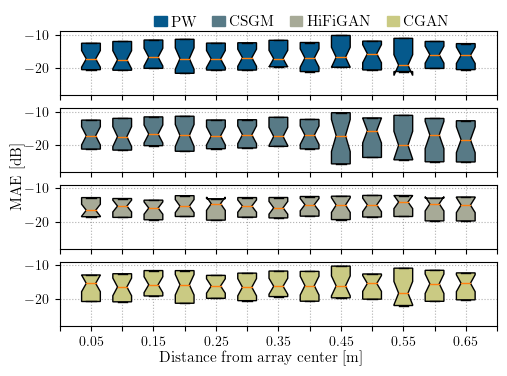

In [13]:
metric = 'mae'
response_numbers = np.arange(0, 15)
PWdata = []
SEGANdata = []
HiFidata = []
CSGMdata = []
_, hifidata, _ = get_data()
grid_ref = hifidata['grid_ref']
r = np.linalg.norm(grid_ref[:2], axis=0).round(2)
r, rind = np.unique(r, return_index= True)

for response_number in response_numbers[rind]:
    h5path1 = os.path.join(str(seganfilepath),f'metrics_inference_{response_number}.h5')
    h5path2 = os.path.join(str(hififilepath),f'metrics_inference_{response_number}.h5')
    h5path3 = os.path.join(str(csgmfilepath),f'metrics_inference_{response_number}.h5')
    metrics_SEGAN = config_metrics(h5path1)
    metrics_hifi = config_metrics(h5path2)
    metrics_csgm = config_metrics(h5path3)
    PWdata.append(metrics_SEGAN[f'td_plwav{metric}'])
    SEGANdata.append(metrics_SEGAN[f'td_gan{metric}'] )
    HiFidata.append(metrics_hifi[f'td_gan{metric}'])
    CSGMdata.append(metrics_csgm[f'td_gan{metric}'])

plot_dict = {
    'PW': np.array(PWdata),
    'CSGM': np.array(CSGMdata),
    'HiFiGAN': np.array(HiFidata),
    'CGAN': np.array(SEGANdata)
}
plot_settings()
fsize = get_figsize(wf = 1.5, hf = .7)
fig = plt.figure(figsize = fsize)
fig = plot_subplots_box_plot(fig, plot_dict,r)
colpatches = []
for ii, key in enumerate(plot_dict.keys()):
    colpatches.append(mpatches.Patch(color=colors[ii], label=key))

fig.legend(handles=colpatches, bbox_to_anchor=(0.88, 1.001),
           borderaxespad=0.,
           handlelength=0.8, handletextpad = 0.3,
           handleheight = 0.6, columnspacing = 1.,
           bbox_transform = plt.gcf().transFigure,
           ncol=4, frameon=False,
           fontsize = 11)
# fig.supylabel('MAE [dB]', fontsize = 10, )
# fig.supxlabel('Distance from array center [m]', fontsize = 10)
fig.text(0.5, 0.015,'Distance from array center [m]', fontsize = 11,  ha='center')
fig.text(0.008, 0.45, 'MAE [dB]', fontsize = 11, rotation='vertical')
fig.tight_layout()
fig.subplots_adjust(wspace=None, hspace=0.2)
fig.show()